<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/03_One_sample_z_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#**Example**

In [ ]:
# You have a population's mean and standard deviation (mean = 18, SD = 3).

# And, here is a sample and 
# you want to test if the sample is different from the known population.
sample = [22, 16, 20, 16, 26, 15, 20, 15, 17, 22,
           15, 25, 19, 18, 16, 13, 29, 27, 21, 19, 
           23, 22, 12, 22, 17, 16, 15, 19, 17, 24]

# Calculate the sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
print("sample Mean : {}", format(sample_mean))
print("sample Std : {}", format(sample_std))

sample Mean : {} 19.266666666666666
sample Std : {} 4.266415222475974


Step 1. Define null and alternative hypotheses


In [ ]:
# H0 : mu = 18
print("H0: The population mean is 18.")

# H1 : mu != 18
print("H1: The population mean is not equal to 18.")

H0: The population mean is 18.
H1: The population mean is not equal to 18.


# Step 2. Calculate a test statistic

In [ ]:
%matplotlib inline

In [ ]:
# z = (sample_mean - mu) / std_error

sample_error = sample_mean - 18
standard_error = 3/ np.sqrt(len(sample))

z = sample_error / standard_error

print("z : {}", format(z))

z : {} 2.3126063539107


# Step 3. Check how likely the test statistic can be obtained.

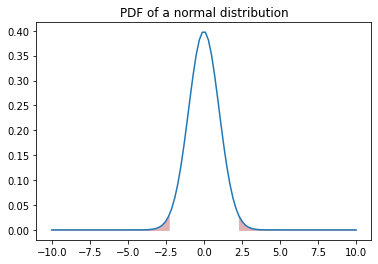

In [ ]:
#the z-statistic follows z-distribution
z_dist = stats.norm(loc = 0, scale = 1) # 표준정규분포
x = np.linspace(-10, 10, 100)
y = z_dist.pdf(x)
plt.plot(x,y)
plt.title('PDF of a normal distribution') 

right_interval = np.linspace(abs(z), x[-1], 50)
left_interval = np.linspace( -x[-1],-abs(z), 50)
plt.fill_between(right_interval, z_dist.pdf(right_interval), color='#e1b1b4', alpha=1)
plt.fill_between(left_interval, z_dist.pdf(left_interval), color='#e1b1b4', alpha=1)

In [ ]:
# Calculate the p-value.
p= integrate.quad(z_dist.pdf, left_interval[0], left_interval[-1]) #  Arg: function, from_value, to_value
p[0]*= 2 # two-tailed

print("The p-value for this test: {}".format(p[0]))


The p-value for this test: 0.02074429187411635


In [ ]:
a = {"번호":123}

In [ ]:
a = [1,1,2,3,2]

In [ ]:
a = set(a)

In [ ]:
a

{1, 2, 3}

In [ ]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: The population mean is not equal to 18.")
else:
  print("Accept H0: The population mean is 18.")

Reject H0: The population mean is not equal to 18.


##### [Additional] You can calculate the p-value by the SF. 

In [ ]:
p = z_dist.sf(abs(z)) * 2
print("p-value : {}".format(p))

p-value : 0.020744291874116326


##### [Additional] You can use critical values.

In [ ]:
cv = z_dist.ppf(.975)
print("Critical values (alpha = 0.05): -{0} ,{0}".format(cv))

Critical values (alpha = 0.05): -1.959963984540054 ,1.959963984540054
